In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Visualise metrics across different models with different learning rate (validation and test set)


In [24]:
# # Read csv file
df_test = pd.read_csv('test_CoxaAI_experiments(new_binary).csv')
df_val = pd.read_csv('val_CoxaAI_experiments(new_binary).csv')
df_test
df_val

,Model,epochs,AUC,roc_auc,BinaryCrossentropy,BinaryAccuracy,mcc,f1,f1_0
0,b1_0005,27,0.975,0.976,0.209,0.910,0.818,0.923,0.893
1,b2_0005,44,0.962,0.968,0.328,0.917,0.831,0.927,0.902
2,b3_0005,47,0.969,0.973,0.269,0.912,0.824,0.921,0.902
3,b4_0005,43,0.970,0.971,0.254,0.918,0.832,0.928,0.903
4,b1_001,50,0.973,0.975,0.238,0.908,0.818,0.915,0.900
5,b2_001,43,0.974,0.975,0.233,0.910,0.818,0.923,0.890
6,b3_001,46,0.969,0.971,0.247,0.905,0.806,0.916,0.890
7,b4_001,45,0.973,0.973,0.217,0.914,0.825,0.925,0.900
8,b1_0001,59,0.957,0.967,0.364,0.906,0.810,0.915,0.894
9,b2_0001,38,0.966,0.970,0.300,0.906,0.808,0.918,0.890


The code below is inspired by ChatGPT

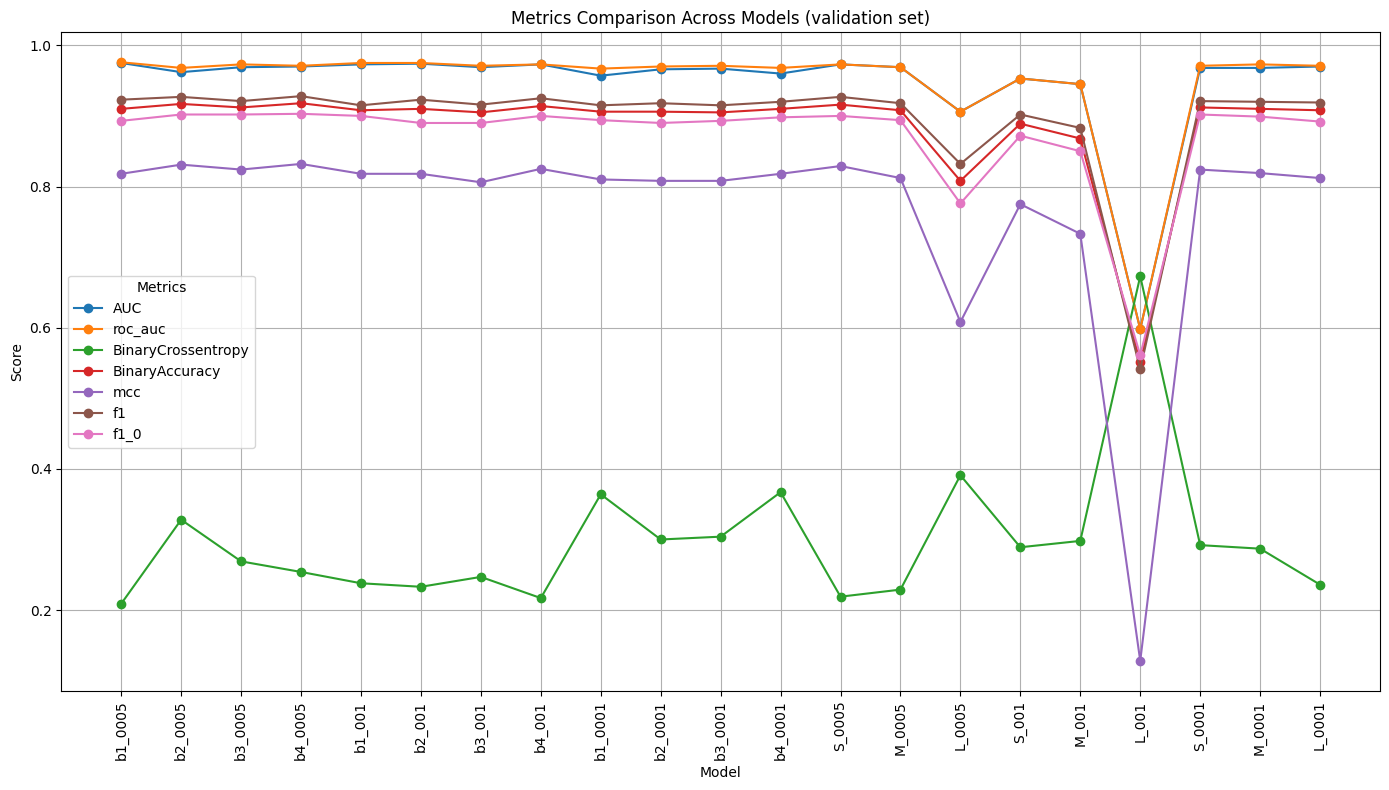

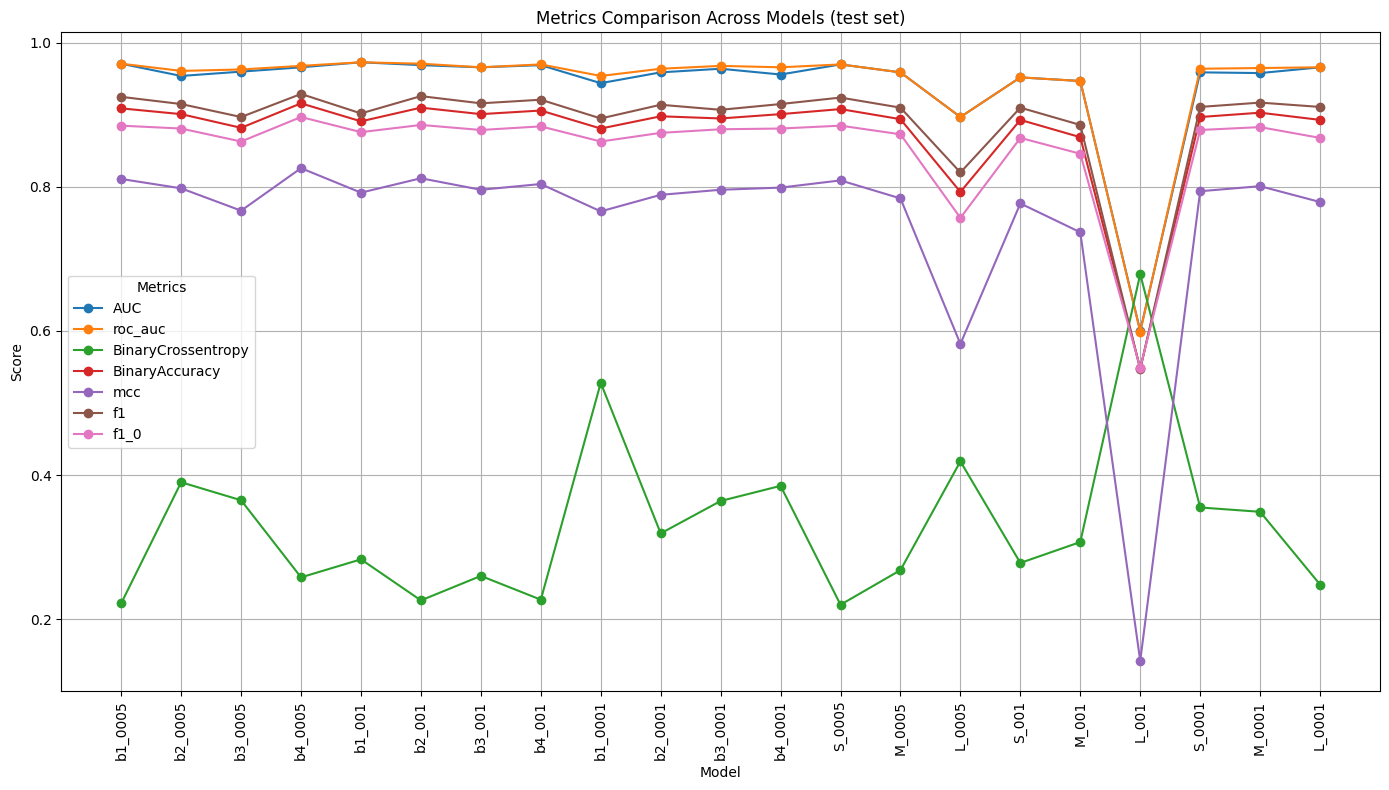

In [25]:
# List of metrics to plot
metrics = ['AUC', 'roc_auc', 'BinaryCrossentropy', 'BinaryAccuracy', 'mcc', 'f1', 'f1_0']



# Plotting all metrics on the same plot
plt.figure(figsize=(14, 8))

for metric in metrics:
    plt.plot(df_val['Model'], df_val[metric], marker='o', label=metric)

plt.title('Metrics Comparison Across Models (validation set)')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.legend(title='Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()




# Plotting all metrics on the same plot
plt.figure(figsize=(14, 8))

for metric in metrics:
    plt.plot(df_test['Model'], df_test[metric], marker='o', label=metric)

plt.title('Metrics Comparison Across Models (test set)')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.legend(title='Metrics')
plt.grid(True)
plt.tight_layout()
plt.show()



In [31]:
# Shows the best model for each metric, except for BinaryCrossentropy (VALIDATION SET)

best_models_val = {}
print('Best model for each metric (validation set):')
for metric in metrics:
    # For binary crossentropy, we want the minimum value
    if metric == 'BinaryCrossentropy':
        best_models_val[metric] = df_val[df_val[metric] == df_val[metric].min()]['Model'].values[0]
    
    best_models_val[metric] = df_val[df_val[metric] == df_val[metric].max()]['Model'].values[0]
    
print(best_models_val)

# Shows the best model for each metric, except for BinaryCrossentropy (TEST SET)
best_models_test = {}
print('Best model for each metric (test set):')
for metric in metrics:
    if metric == 'BinaryCrossentropy':
        best_models_test[metric] = df_val[df_val[metric] == df_val[metric].min()]['Model'].values[0]
    best_models_test[metric] = df_val[df_val[metric] == df_val[metric].max()]['Model'].values[0]

print(best_models_test)


Best model for each metric (validation set):
{'AUC': 'b1_0005', 'roc_auc': 'b1_0005', 'BinaryCrossentropy': 'L_001', 'BinaryAccuracy': 'b4_0005', 'mcc': 'b4_0005', 'f1': 'b4_0005', 'f1_0': 'b4_0005'}
Best model for each metric (test set):
{'AUC': 'b1_0005', 'roc_auc': 'b1_0005', 'BinaryCrossentropy': 'L_001', 'BinaryAccuracy': 'b4_0005', 'mcc': 'b4_0005', 'f1': 'b4_0005', 'f1_0': 'b4_0005'}
